# Boston House Pricing Analysis using Ridge and Lasso Regression

In [41]:
from sklearn.datasets import load_boston

In [42]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
house_data = load_boston()
house_data.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [44]:
boston_data = pd.DataFrame(house_data.data)
boston_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [45]:
boston_data.shape

(506, 13)

In [46]:
dependent_var = house_data.target
dependent_var, dependent_var.shape

(array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
        19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
        20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
        23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
        33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
        21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
        20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
        23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
        15.6, 11.8, 13.8, 15.6, 14.6, 

In [47]:
boston_data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [48]:
house_data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [49]:
boston_data.columns = house_data.feature_names
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [53]:
boston_data['PRICE'] = dependent_var
boston_data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,36.2


In [57]:
X = boston_data.loc[:, :'LSTAT']
y = boston_data.loc[:, 'PRICE']
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [58]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [59]:
X.shape, y.shape

((506, 13), (506,))

# Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [67]:
lin_regression = LinearRegression()
model_sel = cross_val_score(lin_regression, X, y, scoring='neg_mean_squared_error', cv=5)
type(model_sel), model_sel

(numpy.ndarray,
 array([-12.46030057, -26.04862111, -33.07413798, -80.76237112,
        -33.31360656]))

In [68]:
model_sel = np.mean(model_sel)
model_sel

-37.13180746769922

# Ridge Regrssion 

In [69]:
from sklearn.linear_model import Ridge 
from sklearn.model_selection import GridSearchCV

In [70]:
ridge = Ridge()

In [71]:
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X, y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [72]:
ridge_regressor.best_params_, ridge_regressor.best_score_

({'alpha': 100}, -29.905701947540372)

# Lasso Regression

Performs well, when we have large features

In [77]:
from sklearn.linear_model import Lasso

In [78]:
lasso = Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

In [79]:
lasso_regressor.fit(X, y)
lasso_regressor.best_params_, lasso_regressor.best_score_

C:\Users\ramch\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4430.746729651311, tolerance: 3.9191485420792076
  model = cd_fast.enet_coordinate_descent(
C:\Users\ramch\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4397.459304778431, tolerance: 3.3071316790123455
  model = cd_fast.enet_coordinate_descent(
C:\Users\ramch\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3796.653037433508, tolerance: 2.813643886419753
  model = cd_fast.enet_coordinate_descent(
C:\Users\ramch\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

({'alpha': 1}, -35.531580220694856)

In [83]:
import seaborn as sns
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [90]:
prediction_lasso = lasso_regressor.predict(X_test)
prediction_ridge = ridge_regressor.predict(X_test)
prediction_lasso

array([23.74549008, 25.05669894, 27.30699681, 15.26474466, 20.28388223,
       22.75172373, 21.45598059, 24.23856649, 21.11819135, 19.95909495,
        8.98313974, 13.30218316, 17.99925624,  8.39272295, 35.35448484,
       30.78862119, 22.38396018, 34.3159854 , 29.8521009 , 24.63915134,
       25.7851669 , 25.20997813, 20.07312698, 29.34704456, 23.54801802,
       17.49320154, 19.76581421, 22.02254005, 31.35043449, 19.53061141,
       17.86731915, 20.03959005, 22.70589322, 24.27507125, 28.3321545 ,
       20.26286175, 10.68729818, 24.94704305, 15.84336797, 12.8254677 ,
       25.41186454, 20.63647768, 22.05355817, 16.77749717, 23.30629191,
       25.77681736, 19.84379805, 23.32853181, 12.22570134, 23.7054699 ,
       21.09270778, 16.76593695, 24.7895207 , 27.77843148, 15.02615536,
       21.29343807, 21.55732101, 17.59916216, 18.35971801, 19.53427781,
       21.69584327, 22.09466825, 30.77701755, 30.58126341, 18.59617266,
       31.00696923, 18.55257582, 18.71479862, 15.79040727, 22.86

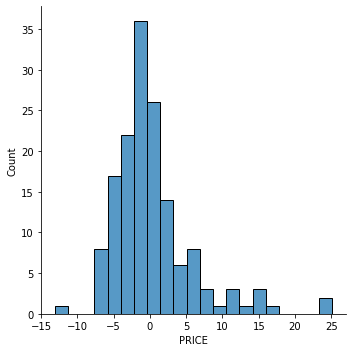

In [92]:
sns.displot(y_test-prediction_lasso)

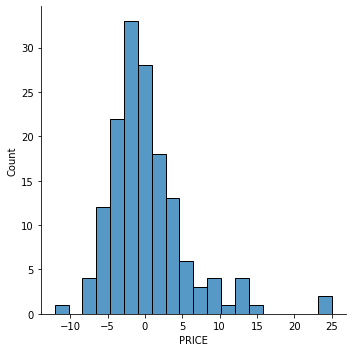

In [89]:
sns.displot(y_test-prediction_ridge)